# Dataset Mean & Standard Deviation Analysis

In [2]:
import pandas as pd
pd.read_csv('./result/dataset_analysis/mean_std_evaluation.csv', index_col=0)

,dataset,type,mean,standard deviaiton,dataset size
0,audio-mnist,train,[-1.0786373e-05],[0.00309664],20000
1,audio-mnist,test,[-1.0200869e-05],[0.00445066],10000
2,speech-commands,train,[-9.120035e-05],[0.08103392],51088
3,speech-commands,test,[-0.00017467],[0.08301105],6835
4,speech-commands,validation,[0.00024789],[0.07386722],6798
5,speech-commands-random,train,[-6.4184766e-05],[0.08157629],32185
6,speech-commands-random,test,[-0.00016766],[0.08044415],15326
7,speech-commands-random,validation,[3.098631e-05],[0.08328391],3577
8,speech-commands-numbers,train,[-8.7964945e-05],[0.08092296],18620
9,speech-commands-numbers,test,[-0.00016285],[0.08646617],2552


In [3]:
from lib.analysisUtils import load_records, TTA_Type, DatasetType

all_records = load_records({
    DatasetType.Audio_MINIST: {
        TTA_Type.TENT: './result/audio-mnist/tent/analysis',
        TTA_Type.TTT: './result/audio-mnist/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/audio-mnist/CoNMix/analysis'
    },
    DatasetType.Speech_Commands: {
        TTA_Type.TENT: './result/speech-commands/tent/analysis',
        TTA_Type.TTT: './result/speech-commands/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/speech-commands/CoNMix/analysis'
    },
    DatasetType.Speech_Command_Random: {
        TTA_Type.TENT: './result/speech-commands-random/tent/analysis',
        TTA_Type.TTT: './result/speech-commands-random/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/speech-commands-random/CoNMix/analysis'
    },
    DatasetType.Speech_Command_Numbers: {
        TTA_Type.TENT: './result/speech-commands-numbers/tent/analysis',
        TTA_Type.TTT: './result/speech-commands-numbers/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/speech-commands-numbers/CoNMix/analysis'
    }
})

# Guassian Noise

In [4]:
from lib.analysisUtils import analyze_guassian_noise
analyze_guassian_noise(all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (0.005),adapted (0.005)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,31.110000,84.68
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,31.110000,80.66
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,30.070000,40.62
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,72.420000,95.39
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,68.544257,41.887345
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,68.544257,34.162399
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,95.610827,NaN
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,93.782004,NaN
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,84.164165,89.136109
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,84.164165,85.79538


# Doing the Dishes

In [5]:
from lib.analysisUtils import analyze_background

analyze_background(noise_type='doing_the_dishes', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.140000,82.770000,14.500000,53.630000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.140000,80.660000,14.500000,53.940000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,33.530000,46.150000,12.890000,14.190000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,58.570000,93.730000,34.330000,87.150000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,66.934894,22.677396,48.368691,17.249451
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,66.934894,17.264082,48.368691,14.133138
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,92.216533,90.826628,82.179956,80.073153
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,88.485735,91.514265,76.225311,85.530358
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,73.319849,81.730393,54.926269,66.481796
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,73.319849,77.032494,54.926269,60.341903


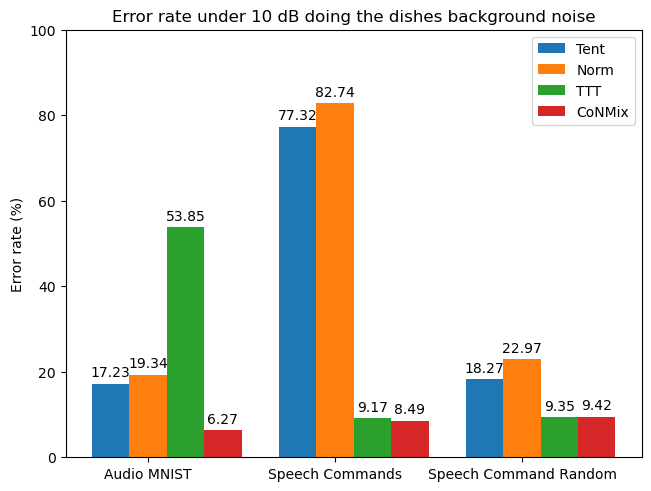

In [6]:
from lib.analysisUtils import error_rate_analysis

result_10dB = {
    'Tent': (100-82.77, 100-22.68, 100-81.73),
    'Norm': (100-80.66, 100-17.26, 100-77.03),
    'TTT': (100-46.15, 100-90.83, 100-90.65),
    'CoNMix': (100-93.73, 100-91.51, round(100-90.578103, 2))
}

result_3dB = {
    'Tent': (100-53.63, round(100-17.249451, 2), round(100-66.481796, 2)),
    'Norm': (100-53.94, round(100-14.133138, 2), round(100-60.341903, 2)),
    'TTT': (100-14.19, round(100-80.073153, 2), round(100-80.125277, 2)),
    'CoNMix': (100-87.15, round(100-85.530358, 2), round(100-83.713950, 2))
}

error_rate_analysis(result=result_10dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 10 dB doing the dishes background noise')

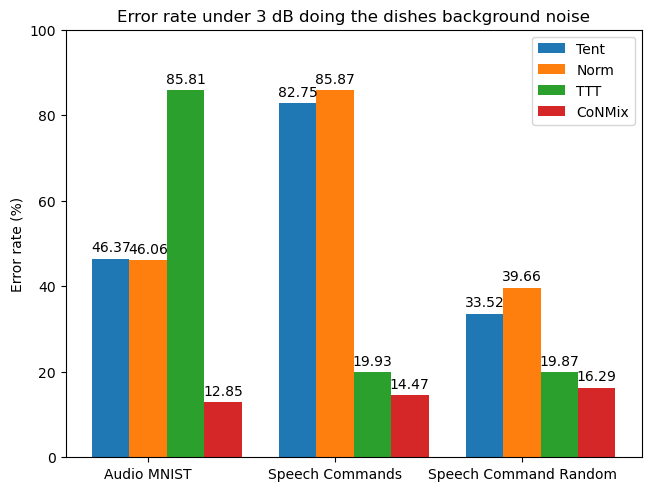

In [7]:


error_rate_analysis(result=result_3dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 3 dB doing the dishes background noise')

# Exercise bike

In [8]:
analyze_background(noise_type='exercise_bike', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,30.600000,87.560000,19.360000,66.370000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,30.600000,84.370000,19.360000,64.080000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,44.640000,48.540000,10.800000,10.190000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,49.700000,94.690000,29.910000,84.990000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,62.472568,20.804682,48.002926,16.517922
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,62.472568,16.122897,48.002926,13.796635
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,91.470373,89.144111,84.330651,78.361375
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,87.812729,91.675201,77.234821,85.866862
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,66.697116,80.223150,51.520292,65.731437
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,66.697116,73.587368,51.520292,58.573666


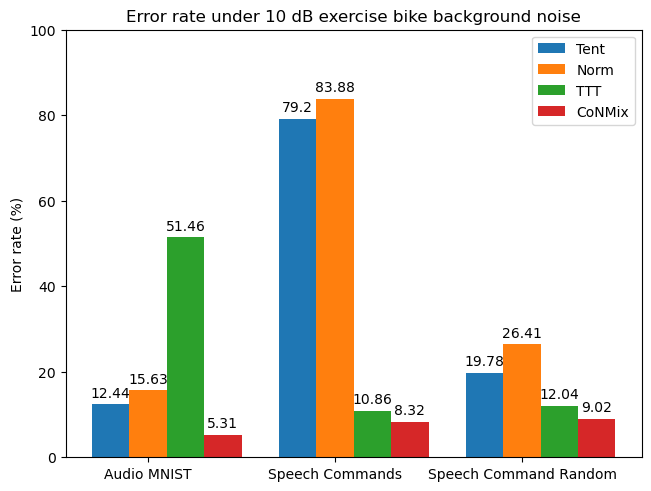

In [9]:
result_10dB = {
    'Tent': (100-87.56, round(100-20.804682, 2), round(100-80.223150, 2)),
    'Norm': (100-84.37, round(100-16.122897, 2), round(100-73.587368, 2)),
    'TTT': (100-48.54, round(100-89.144111, 2), round(100-87.961634, 2)),
    'CoNMix': (100-94.69, round(100-91.675201, 2), round(100-90.982644, 2))
}

result_3dB = {
    'Tent': (100-66.37, round(100-16.517922, 2), round(100-65.731437, 2)),
    'Norm': (100-64.08, round(100-13.796635, 2), round(100-58.573666, 2)),
    'TTT': (100-10.19, round(100-78.361375, 2), round(100-75.016312, 2)),
    'CoNMix': (100-84.99, round(100-85.866862, 2), round(100-85.208143, 2))
}

error_rate_analysis(result=result_10dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 10 dB exercise bike background noise')

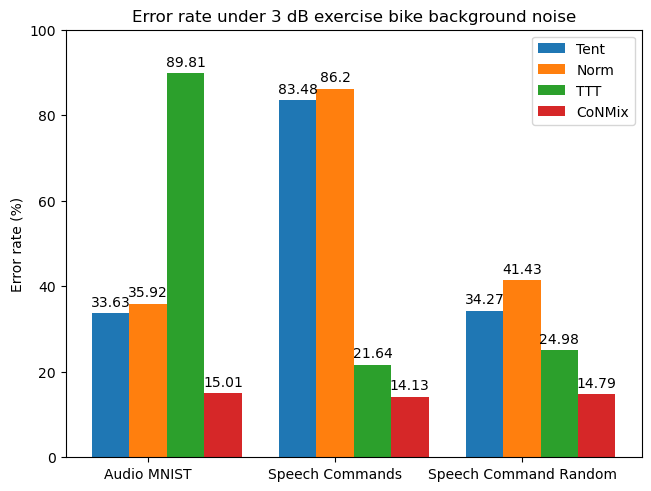

In [10]:
error_rate_analysis(result=result_3dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 3 dB exercise bike background noise')

# Running tap

In [11]:
analyze_background(noise_type='running_tap', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.660000,87.490000,28.770000,71.180000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.660000,85.410000,28.770000,66.970000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,46.020000,48.560000,14.810000,19.940000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,48.550000,94.630000,28.100000,87.250000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,65.515728,21.068032,56.532553,17.878566
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,65.515728,16.693489,56.532553,13.972202
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,91.997074,90.797366,86.130212,83.072421
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,88.105340,91.967813,81.492319,87.768837
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,68.993867,81.260603,58.886859,70.905651
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,68.993867,75.362130,58.886859,64.530863


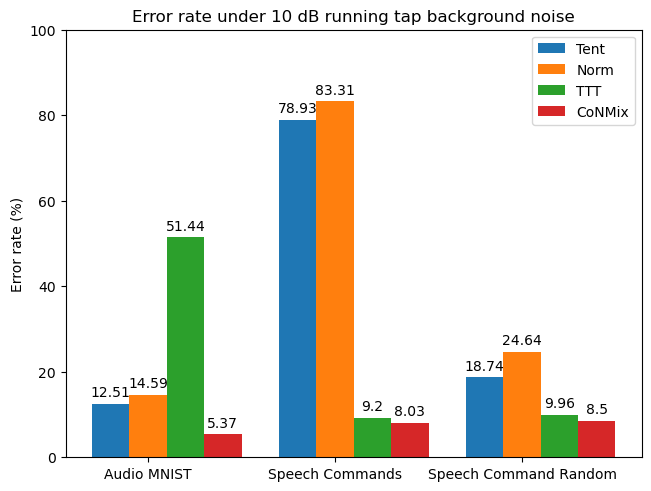

In [12]:
result_10dB = {
    'Tent': (100-87.49, round(100-21.068032, 2), round(100-81.260603, 2)),
    'Norm': (100-85.41, round(100-16.693489, 2), round(100-75.362130, 2)),
    'TTT': (100-48.56, round(100-90.797366, 2), round(100-90.036539, 2)),
    'CoNMix': (100-94.63, round(100-91.967813, 2), round(100-91.504633, 2))
}

result_3dB = {
    'Tent': (100-71.18, round(100-17.878566, 2), round(100-70.905651, 2)),
    'Norm': (100-66.97, round(100-13.972202, 2), round(100-64.530863, 2)),
    'TTT': (100-19.94, round(100-83.072421, 2), round(100-81.554222, 2)),
    'CoNMix': (100-87.25, round(100-87.768837, 2), round(100-87.589717, 2))
}

error_rate_analysis(result=result_10dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 10 dB running tap background noise')

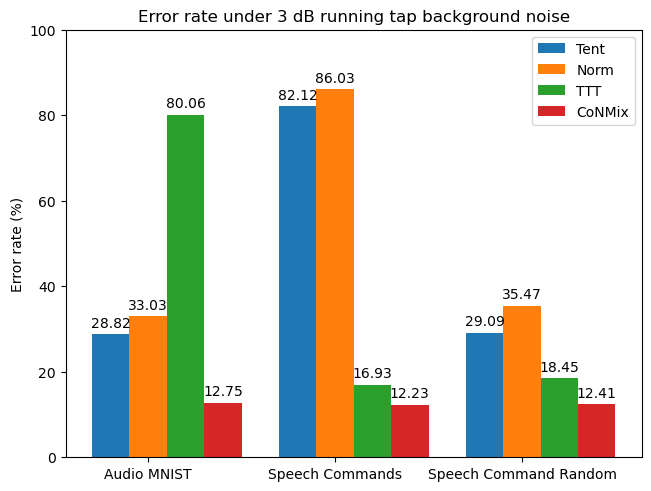

In [13]:
error_rate_analysis(result=result_3dB, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate under 3 dB running tap background noise')

# TENT Analysis

In [14]:
from lib.analysisUtils import search
def get_record(noise_type='exercise_bike', severity=10.) -> pd.DataFrame:
    minist_records = all_records[DatasetType.Audio_MINIST][TTA_Type.TENT]
    numbers_records = all_records[DatasetType.Speech_Command_Numbers][TTA_Type.TENT]
    random_records= all_records[DatasetType.Speech_Command_Random][TTA_Type.TENT]
    speech_records = all_records[DatasetType.Speech_Commands][TTA_Type.TENT]
    
    minist_records = search(df=minist_records, algorithm='restnet50', corruption=noise_type, severity_level=severity)
    speech_records = search(df=speech_records, algorithm='restnet50', corruption=noise_type, severity_level=severity)
    random_records = search(df=random_records, algorithm='restnet50', corruption=noise_type, severity_level=severity)
    numbers_records = search(df=numbers_records, algorithm='restnet50', corruption=noise_type, severity_level=severity)
    return pd.concat([minist_records, numbers_records, random_records, speech_records], axis=0, ignore_index=True)
get_record()

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands-numbers,restnet50,NaN,exercise_bike,69.318182,30.681818,10.0,25567042
1,speech-commands-numbers,restnet50,Tent Adaptation + normalized,exercise_bike,36.833856,63.166144,10.0,25567042
2,speech-commands-numbers,restnet50,Norm Adaptation + normalized,exercise_bike,31.387147,68.612853,10.0,25567042
3,speech-commands-random,restnet50,NaN,exercise_bike,66.697116,33.302884,10.0,25587062
4,speech-commands-random,restnet50,Tent Adaptation + normalized,exercise_bike,80.223150,19.776850,10.0,25587062
5,speech-commands-random,restnet50,Norm Adaptation + normalized,exercise_bike,73.587368,26.412632,10.0,25587062
6,speech-commands,restnet50,NaN,exercise_bike,62.472568,37.527432,10.0,25587062
7,speech-commands,restnet50,Tent Adaptation + normalized,exercise_bike,20.804682,79.195318,10.0,25587062
8,speech-commands,restnet50,Norm Adaptation + normalized,exercise_bike,16.122897,83.877103,10.0,25587062


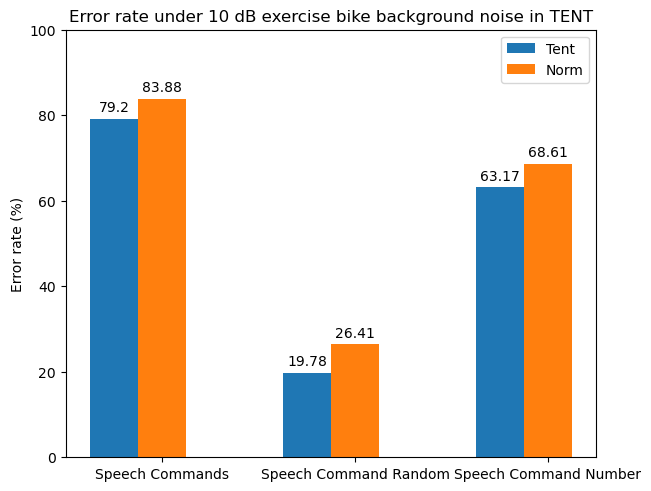

In [15]:
result_10dB = {
    'Tent': (round(100-20.804682, 2), round(100-80.223150, 2), round(63.166144, 2)),
    'Norm': (round(100-16.122897, 2), round(100-73.587368, 2), round(68.612853, 2)),
}

error_rate_analysis(
    result=result_10dB, 
    datasets=['Speech Commands', 'Speech Command Random', 'Speech Command Number'], 
    title='Error rate under 10 dB exercise bike background noise in TENT',
    width=.25
)

In [16]:
get_record(noise_type='gaussian_noise', severity=0.005)

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,restnet50,NaN,gaussian_noise,31.110000,68.890000,0.005,25567042
1,audio-mnist,restnet50,Tent Adaptation,gaussian_noise,84.680000,15.320000,0.005,25567042
2,audio-mnist,restnet50,Norm Adaptation,gaussian_noise,80.660000,19.340000,0.005,25567042
3,speech-commands-numbers,restnet50,NaN,gaussian_noise,80.329154,19.670846,0.005,25567042
4,speech-commands-numbers,restnet50,Tent Adaptation + normalized,gaussian_noise,37.813480,62.186520,0.005,25567042
5,speech-commands-numbers,restnet50,Norm Adaptation + normalized,gaussian_noise,32.131661,67.868339,0.005,25567042
6,speech-commands-random,restnet50,NaN,gaussian_noise,84.164165,15.835835,0.005,25587062
7,speech-commands-random,restnet50,Tent Adaptation + normalized,gaussian_noise,89.136109,10.863891,0.005,25587062
8,speech-commands-random,restnet50,Norm Adaptation + normalized,gaussian_noise,85.795380,14.204620,0.005,25587062
9,speech-commands,restnet50,NaN,gaussian_noise,68.544257,31.455743,0.005,25587062


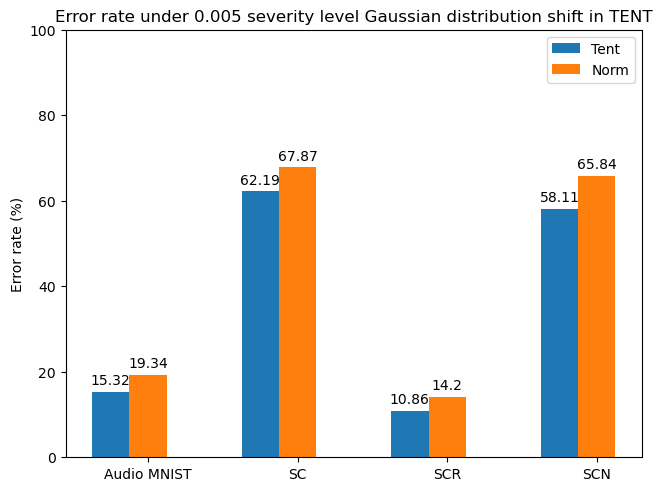

In [17]:
gaussian_result_005 = {
    'Tent': (round(15.32, 2), round(62.186520, 2), round(10.863891, 2), round(58.112655, 2)),
    'Norm': (round(19.34, 2), round(67.868339, 2), round(14.204620, 2), round(65.837601, 2))
}

error_rate_analysis(
    result=gaussian_result_005, 
    datasets=['Audio MNIST','SC', 'SCR', 'SCN'], 
    title='Error rate under 0.005 severity level Gaussian distribution shift in TENT',
    width=.25
)

# TTT Analysis

In [18]:
def get_TTT_records(noise_type='exercise_bike') -> pd.DataFrame:
    speech_records = all_records[DatasetType.Speech_Commands][TTA_Type.TTT]
    speech_records = search(df=speech_records, corruption=noise_type, severity_level=10.)
    random_records = all_records[DatasetType.Speech_Command_Random][TTA_Type.TTT]
    random_records = search(df=random_records, corruption=noise_type, severity_level=10.)
    number_records = all_records[DatasetType.Speech_Command_Numbers][TTA_Type.TTT]
    number_records = search(df=number_records, corruption=noise_type, severity_level=10.)
    return pd.concat([number_records, random_records, speech_records], axis=0, ignore_index=True)

get_TTT_records()

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands-numbers,RestNet50_base,NaN,exercise_bike,94.200627,5.799373,10.0,1513069
1,speech-commands-numbers,RestNet50_base,"TTT, ts, bn, online",exercise_bike,93.181818,6.818182,10.0,1513069
2,speech-commands-random,RestNet50_base,NaN,exercise_bike,90.995694,9.004306,10.0,1518209
3,speech-commands-random,RestNet50_base,"TTT, ts, bn, online",exercise_bike,87.961634,12.038366,10.0,1518209
4,speech-commands,RestNet26_base,NaN,exercise_bike,91.470373,8.529627,10.0,740481
5,speech-commands,RestNet26_base,"TTT, ts, bn, online",exercise_bike,89.144111,10.855889,10.0,740481


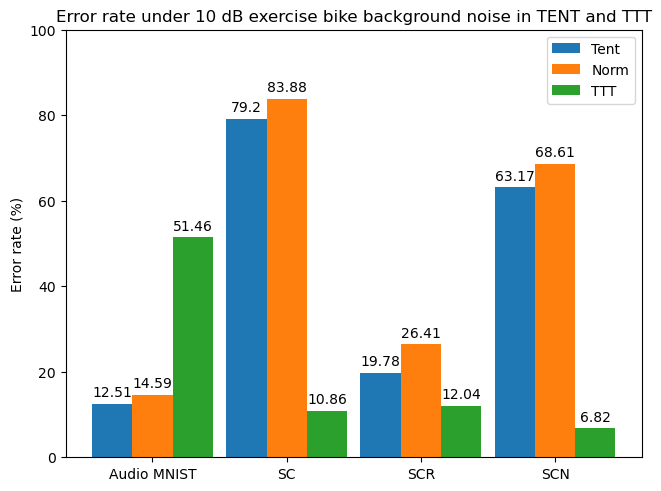

In [19]:
result_10dB = {
    'Tent': (100-87.49, round(100-20.804682, 2), round(100-80.223150, 2), round(63.166144, 2)),
    'Norm': (100-85.41, round(100-16.122897, 2), round(100-73.587368, 2), round(68.612853, 2)),
    'TTT': (100-48.54, round(100-89.144111, 2), round(100-87.961634, 2), round(6.818182, 2)),
}

error_rate_analysis(
    result=result_10dB, 
    datasets=['Audio MNIST', 'SC', 'SCR', 'SCN'], 
    title='Error rate under 10 dB exercise bike background noise in TENT and TTT', 
    width=.3
)

# CoNMix Analysis

In [20]:
def get_CoNMix_records(noise_type='exercise_bike') -> pd.DataFrame:
    sc_records = all_records[DatasetType.Speech_Commands][TTA_Type.CONMIX]
    sc_records = search(df=sc_records, corruption=noise_type, severity_level=10.)
    random_records = all_records[DatasetType.Speech_Command_Random][TTA_Type.CONMIX]
    random_records = search(df=random_records, corruption=noise_type, severity_level=10.)
    number_records = all_records[DatasetType.Speech_Command_Numbers][TTA_Type.CONMIX]
    number_records = search(df=number_records, corruption=noise_type, severity_level=10.)
    return pd.concat([sc_records, random_records, number_records], axis=0, ignore_index=True)

get_CoNMix_records()

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,R50+ViT-B_16,NaN,exercise_bike,87.812729,12.187271,10.0,103692988
1,speech-commands,R50+ViT-B_16,CoNMix-STDA,exercise_bike,91.675201,8.324799,10.0,103692988
2,speech-commands-random,R50+ViT-B_16,NaN,exercise_bike,87.681065,12.318935,10.0,103692988
3,speech-commands-random,R50+ViT-B_16,CoNMix-STDA,exercise_bike,90.982644,9.017356,10.0,103692988
4,speech-commands-numbers,R50+ViT-B_16,NaN,exercise_bike,91.888715,8.111285,10.0,103687828
5,speech-commands-numbers,R50+ViT-B_16,CoNMix-STDA,exercise_bike,93.103448,6.896552,10.0,103687828


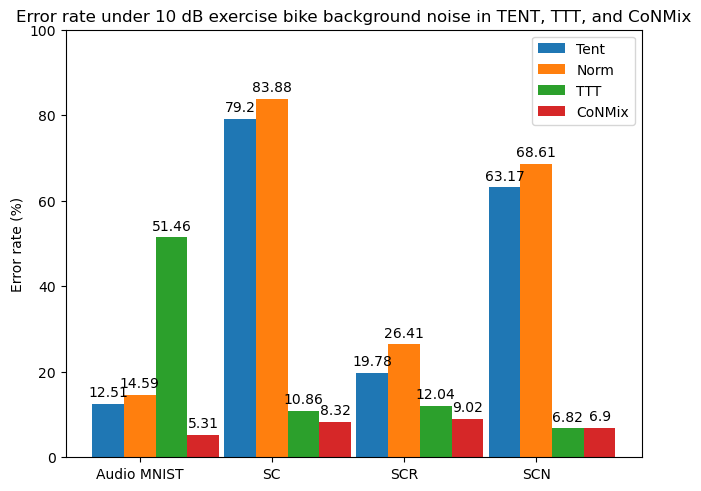

In [21]:
result_10dB = {
    'Tent': (100-87.49, round(100-20.804682, 2), round(100-80.223150, 2), round(63.166144, 2)),
    'Norm': (100-85.41, round(100-16.122897, 2), round(100-73.587368, 2), round(68.612853, 2)),
    'TTT': (100-48.54, round(100-89.144111, 2), round(100-87.961634, 2), round(6.818182, 2)),
    'CoNMix': (100-94.69, round(100-91.675201, 2), round(100-90.982644, 2), round(6.896552, 2))
}

error_rate_analysis(
    result=result_10dB, 
    datasets=['Audio MNIST', 'SC', 'SCR', 'SCN'], 
    title='Error rate under 10 dB exercise bike background noise in TENT, TTT, and CoNMix', 
    width=.24
)

In [36]:
def get_origin_records() -> pd.DataFrame:
    def get_origin_record(df: pd.DataFrame, algorithm=None):
        return search(df=df, tta_operation=pd.NA, corruption=pd.NA, algorithm=algorithm).iloc[0]
    def get_origin_rcs(data_type:DatasetType) -> pd.DataFrame:
        conmix_rc = all_records[data_type][TTA_Type.CONMIX]
        ret = pd.DataFrame(columns=conmix_rc.columns)
        ret.loc[len(ret)] = get_origin_record(conmix_rc)
        ret.loc[len(ret)] = get_origin_record(all_records[data_type][TTA_Type.TTT])
        ret.loc[len(ret)] = get_origin_record(all_records[data_type][TTA_Type.TENT], algorithm='restnet50')
        return ret
    mnist_rcs = get_origin_rcs(DatasetType.Audio_MINIST)
    sc_rcs = get_origin_rcs(DatasetType.Speech_Commands)
    scr_rcs = get_origin_rcs(DatasetType.Speech_Command_Random)
    scn_rcs = get_origin_rcs(DatasetType.Speech_Command_Numbers)
    return pd.concat([mnist_rcs, sc_rcs, scr_rcs, scn_rcs], axis=0, ignore_index=True)

get_origin_records()

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,ViT,NaN,NaN,97.34,2.66,0.0,103687828
1,audio-mnist,RestNet_base,NaN,NaN,93.52,6.48,0.0,737005
2,audio-mnist,restnet50,NaN,NaN,95.56,4.44,0.0,25567042
3,speech-commands,R50+ViT-B_16,NaN,NaN,95.098756,4.901244,0.0,103692988
4,speech-commands,RestNet26_base,NaN,NaN,96.327725,3.672275,0.0,740481
5,speech-commands,restnet50,NaN,NaN,87.666423,12.333577,0.0,25587062
6,speech-commands-random,R50+ViT-B_16,NaN,NaN,95.308626,4.691374,0.0,103692988
7,speech-commands-random,RestNet50_base,NaN,NaN,96.398277,3.601723,0.0,1518209
8,speech-commands-random,restnet50,NaN,NaN,91.993997,8.006003,0.0,25587062
9,speech-commands-numbers,R50+ViT-B_16,NaN,NaN,96.551724,3.448276,0.0,103687828


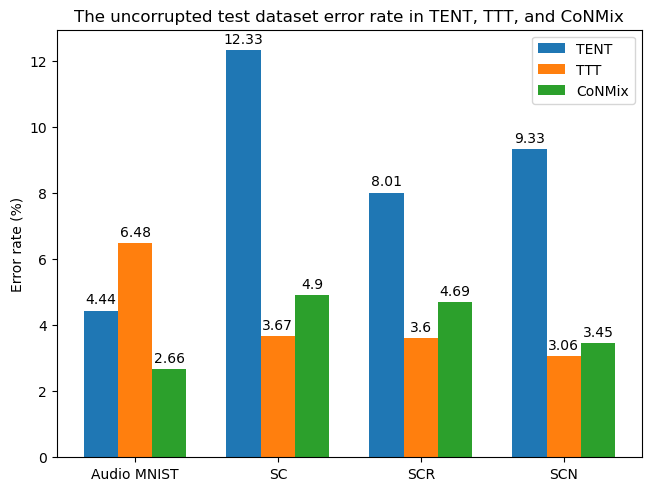

In [40]:
origin_error_rates = {
    'TENT': (4.44, round(12.333577, 2), round(8.006003, 2), round(9.326019, 2)),
    'TTT': (6.48, round(3.672275, 2), round(3.601723, 2), round(3.056426, 2)),
    'CoNMix': (2.66, round(4.901244, 2), round(4.691374, 2), round(3.448276, 2))
}

error_rate_analysis(
    result=origin_error_rates, 
    datasets=['Audio MNIST', 'SC', 'SCR', 'SCN'], 
    title='The uncorrupted test dataset error rate in TENT, TTT, and CoNMix', 
    width=.24, 
    ylim=False
)